In [457]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [475]:
df=pd.read_csv("../examples/test-output/static-full.dat",skiprows=2)

df.columns=df.columns.str.strip()

In [476]:
df.tail()

,Time,Density,gasTemp,av,point,H,#H,H+,@H,H2,...,HS2,HS2+,HSO2+,H2S2+,H2S2,#H2S2,@H2S2,BULK,SURFACE,E-
229,4600000.0,10000.0,10.0,2.9644,1,0.000024,3.883170e-23,3.697680e-10,3.081380e-22,0.499665,...,7.866350e-13,1.178550e-13,6.572900e-14,5.243030e-16,2.851320e-12,1.063450e-10,8.438710e-10,0.000314,0.00004,6.534670e-07
230,4700000.0,10000.0,10.0,2.9644,1,0.000024,3.892140e-23,3.697660e-10,3.090320e-22,0.499662,...,7.872890e-13,1.178910e-13,6.614700e-14,5.253440e-16,2.886060e-12,1.077050e-10,8.551670e-10,0.000314,0.00004,6.527600e-07
231,4800000.0,10000.0,10.0,2.9644,1,0.000024,3.901100e-23,3.697670e-10,3.099220e-22,0.499660,...,7.878950e-13,1.179210e-13,6.655940e-14,5.263500e-16,2.919760e-12,1.090290e-10,8.661730e-10,0.000314,0.00004,6.520630e-07
232,4900000.0,10000.0,10.0,2.9644,1,0.000024,3.910020e-23,3.697700e-10,3.108070e-22,0.499658,...,7.884590e-13,1.179480e-13,6.696620e-14,5.273200e-16,2.952470e-12,1.103160e-10,8.768960e-10,0.000315,0.00004,6.513770e-07
233,5000000.0,10000.0,10.0,2.9644,1,0.000024,3.918880e-23,3.697750e-10,3.116850e-22,0.499656,...,7.889830e-13,1.179710e-13,6.736750e-14,5.282580e-16,2.984220e-12,1.115670e-10,8.873420e-10,0.000315,0.00004,6.507010e-07


In [477]:
def ice_total(species):
    return df[f"#{species}"].values+df[f"@{species}"].values

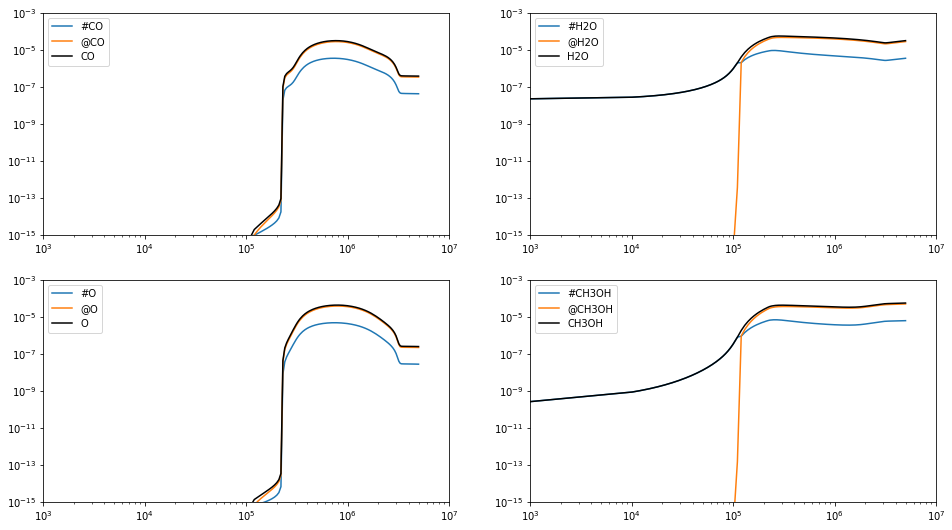

In [478]:
fgi,axes=plt.subplots(2,2,figsize=(16,9))
species=["CO","H2O","O","CH3OH"]
for i,ax in enumerate(axes.flatten()):
    spec=species[i]
    ax.plot(df["Time"],df[f"#{spec}"],label=f"#{spec}")
    ax.plot(df["Time"],df[f"@{spec}"],label=f"@{spec}")
    ax.plot(df["Time"],ice_total(spec),label=f"{spec}",color="black")
    ax.plot()
    ax.set(yscale="log",ylim=(1e-15,1e-3),xscale="log",xlim=(1e3,1e7))
    ax.legend()

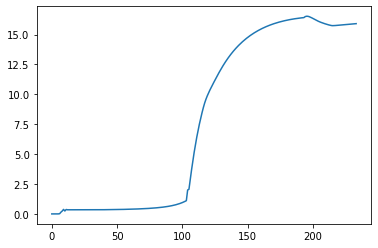

In [479]:
sites_per_grain=1884955.6446075444
gas_to_dust=756764614951.04846

surface_per_grain=df["SURFACE"]*gas_to_dust
surface_layers=surface_per_grain/sites_per_grain

plt.plot(surface_layers)

In [428]:
h2o_be=5600.0
temps=np.arange(0,500,10)
hop=np.exp(-h2o_be/temps)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


[None, (1e-30, 1)]

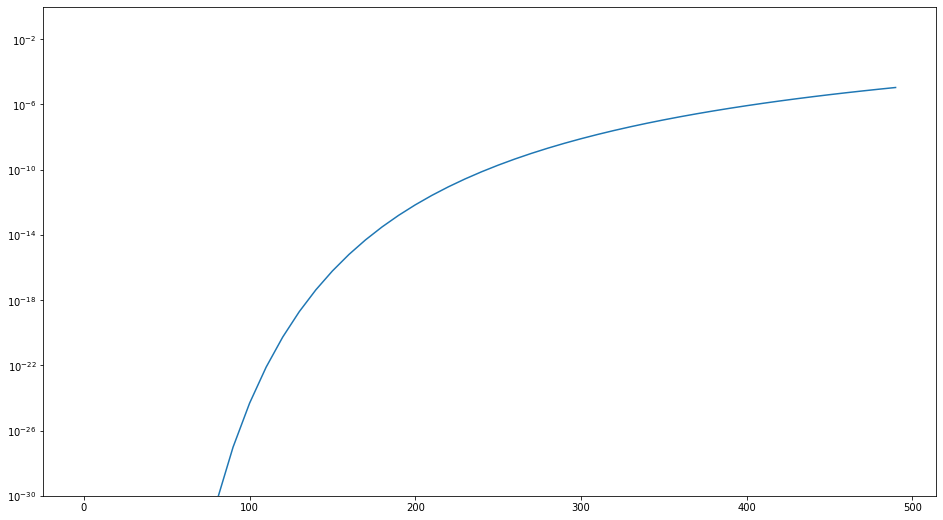

In [422]:
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(temps,hop)
ax.set(yscale="log",ylim=(1e-30,1))
